In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
avocado_df = pd.read_csv('avocado.csv')


In [4]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
avocado_df=avocado_df[avocado_df['region']=='West']

KeyError: 'region'

In [6]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


In [8]:
avocado_df=avocado_df[['Date','AveragePrice']]


In [9]:
avocado_df

,Date,AveragePrice
2704,2015-12-27,0.83
2705,2015-12-20,0.88
2706,2015-12-13,0.85
2707,2015-12-06,0.75
2708,2015-11-29,0.99
...,...,...
18232,2018-02-04,1.41
18233,2018-01-28,1.80
18234,2018-01-21,1.83
18235,2018-01-14,1.82


In [11]:
avocado_df.columns=['ds','y']

In [12]:
avocado_df

,ds,y
2704,2015-12-27,0.83
2705,2015-12-20,0.88
2706,2015-12-13,0.85
2707,2015-12-06,0.75
2708,2015-11-29,0.99
...,...,...
18232,2018-02-04,1.41
18233,2018-01-28,1.80
18234,2018-01-21,1.83
18235,2018-01-14,1.82


In [13]:
m=Prophet()

In [14]:
m.fit(avocado_df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244748,0.633116,1.501141,1.244748,1.244748,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,0.0,0.0,0.0,1.059849
1,2015-01-04,1.244748,0.654727,1.484817,1.244748,1.244748,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,0.0,0.0,0.0,1.059849
2,2015-01-11,1.243905,0.650110,1.490428,1.243905,1.243905,-0.165312,-0.165312,-0.165312,-0.165312,-0.165312,-0.165312,0.0,0.0,0.0,1.078593
3,2015-01-11,1.243905,0.671670,1.521223,1.243905,1.243905,-0.165312,-0.165312,-0.165312,-0.165312,-0.165312,-0.165312,0.0,0.0,0.0,1.078593
4,2015-01-18,1.243062,0.679007,1.491980,1.243062,1.243062,-0.156124,-0.156124,-0.156124,-0.156124,-0.156124,-0.156124,0.0,0.0,0.0,1.086938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.735727,1.111585,1.958428,1.709667,1.764685,-0.204396,-0.204396,-0.204396,-0.204396,-0.204396,-0.204396,0.0,0.0,0.0,1.531331
699,2019-03-22,1.736305,1.132381,1.966631,1.710089,1.765448,-0.199310,-0.199310,-0.199310,-0.199310,-0.199310,-0.199310,0.0,0.0,0.0,1.536995
700,2019-03-23,1.736883,1.113676,1.967167,1.710521,1.766126,-0.193658,-0.193658,-0.193658,-0.193658,-0.193658,-0.193658,0.0,0.0,0.0,1.543225
701,2019-03-24,1.737461,1.128310,1.982189,1.710954,1.766804,-0.187546,-0.187546,-0.187546,-0.187546,-0.187546,-0.187546,0.0,0.0,0.0,1.549915


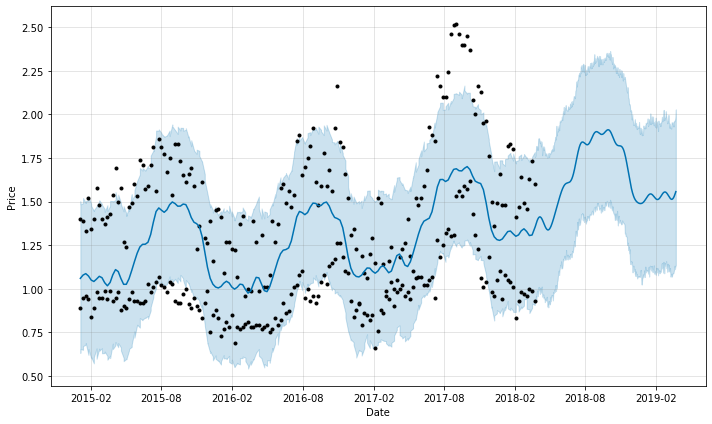

In [17]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

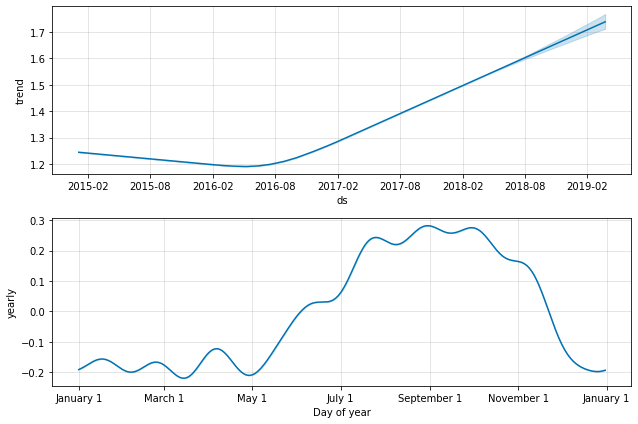

In [18]:
figure=m.plot_components(forecast)